In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [2]:
df = pd.read_csv("Datasets/telco.csv.zip")

In [4]:
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [6]:
df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Under 30                              object
Senior Citizen                        object
Married                               object
Dependents                            object
Number of Dependents                   int64
Country                               object
State                                 object
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Population                             int64
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple L

In [16]:
df.drop(['Customer ID','Under 30','Dependents','Zip Code','Population','Quarter','Referred a Friend','Avg Monthly Long Distance Charges','Paperless Billing','Total Long Distance Charges','Customer Status','Churn Score','CLTV','Churn Category','Churn Reason'],axis=1,inplace=True)

In [17]:
df.dtypes

Gender                       object
Age                           int64
Senior Citizen               object
Married                      object
Number of Dependents          int64
Country                      object
State                        object
City                         object
Latitude                    float64
Longitude                   float64
Number of Referrals           int64
Tenure in Months              int64
Offer                        object
Phone Service                object
Multiple Lines               object
Internet Service             object
Internet Type                object
Avg Monthly GB Download       int64
Online Security              object
Online Backup                object
Device Protection Plan       object
Premium Tech Support         object
Streaming TV                 object
Streaming Movies             object
Streaming Music              object
Unlimited Data               object
Contract                     object
Payment Method              

In [39]:
df['Contract'].unique()

array(['Month-to-Month', 'One Year', 'Two Year'], dtype=object)

In [56]:
df['Married'] = df['Married'].replace({'Yes': 1, 'No': 0})
df['Senior Citizen'] = df['Senior Citizen'].replace({'Yes': 1, 'No': 0})
df['Phone Service'] = df['Phone Service'].replace({'Yes': 1, 'No': 0})
df['Premium Tech Support'] = df['Premium Tech Support'].replace({'Yes': 1, 'No': 0})
df['Device Protection Plan'] = df['Device Protection Plan'].replace({'Yes': 1, 'No': 0})
df['Online Backup'] = df['Online Backup'].replace({'Yes': 1, 'No': 0})
df['Online Security'] = df['Online Security'].replace({'Yes': 1, 'No': 0})
df['Internet Service'] = df['Internet Service'].replace({'Yes': 1, 'No': 0})
df['Multiple Lines'] = df['Multiple Lines'].replace({'Yes': 1, 'No': 0})
df['Streaming TV'] = df['Streaming TV'].replace({'Yes': 1, 'No': 0})
df['Unlimited Data'] = df['Unlimited Data'].replace({'Yes': 1, 'No': 0})
df['Streaming Music'] = df['Streaming Music'].replace({'Yes': 1, 'No': 0})
df['Streaming Movies'] = df['Streaming Movies'].replace({'Yes': 1, 'No': 0})
df['Churn Label'] = df['Churn Label'].replace({'Yes': 1, 'No': 0})

In [57]:
df.dtypes

Gender                       object
Age                           int64
Senior Citizen                int64
Married                       int64
Number of Dependents          int64
Country                      object
State                        object
City                         object
Latitude                    float64
Longitude                   float64
Number of Referrals           int64
Tenure in Months              int64
Offer                        object
Phone Service                 int64
Multiple Lines                int64
Internet Service              int64
Internet Type                object
Avg Monthly GB Download       int64
Online Security               int64
Online Backup                 int64
Device Protection Plan        int64
Premium Tech Support          int64
Streaming TV                  int64
Streaming Movies              int64
Streaming Music               int64
Unlimited Data                int64
Contract                     object
Payment Method              

In [58]:
X = df.drop(['Churn Label'],axis=1)
X.head()

,Gender,Age,Senior Citizen,Married,Number of Dependents,Country,State,City,Latitude,Longitude,...,Streaming Music,Unlimited Data,Contract,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Revenue,Satisfaction Score
0,Male,78,1,0,0,United States,California,Los Angeles,34.023810,-118.156582,...,0,0,Month-to-Month,Bank Withdrawal,39.65,39.65,0.00,20,59.65,3
1,Female,74,1,1,1,United States,California,Los Angeles,34.044271,-118.185237,...,0,1,Month-to-Month,Credit Card,80.65,633.30,0.00,0,1024.10,3
2,Male,71,1,0,3,United States,California,Los Angeles,34.108833,-118.229715,...,1,1,Month-to-Month,Bank Withdrawal,95.45,1752.55,45.61,0,1910.88,2
3,Female,78,1,1,1,United States,California,Inglewood,33.936291,-118.332639,...,0,1,Month-to-Month,Bank Withdrawal,98.50,2514.50,13.43,0,2995.07,2
4,Female,80,1,1,1,United States,California,Whittier,33.972119,-118.020188,...,0,1,Month-to-Month,Bank Withdrawal,76.50,2868.15,0.00,0,3102.36,2


In [59]:
X = pd.get_dummies(X,columns=['Gender','Country','State','City','Offer','Internet Type','Contract','Payment Method'])
X.head()

,Age,Senior Citizen,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Phone Service,Multiple Lines,...,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,78,1,0,0,34.023810,-118.156582,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,74,1,1,1,34.044271,-118.185237,1,8,1,1,...,0,0,1,0,1,0,0,0,1,0
2,71,1,0,3,34.108833,-118.229715,0,18,1,1,...,0,0,1,0,1,0,0,1,0,0
3,78,1,1,1,33.936291,-118.332639,1,25,1,0,...,0,0,1,0,1,0,0,1,0,0
4,80,1,1,1,33.972119,-118.020188,1,37,1,1,...,0,0,1,0,1,0,0,1,0,0


In [60]:
X.dtypes

Age                                 int64
Senior Citizen                      int64
Married                             int64
Number of Dependents                int64
Latitude                          float64
                                   ...   
Contract_One Year                   uint8
Contract_Two Year                   uint8
Payment Method_Bank Withdrawal      uint8
Payment Method_Credit Card          uint8
Payment Method_Mailed Check         uint8
Length: 1152, dtype: object

In [61]:
Y = df['Churn Label']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn Label, dtype: int64

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [63]:
train = xgb.DMatrix(X_train,label=Y_train)
test = xgb.DMatrix(X_test,label=Y_test)

In [78]:
param = {
    'max_depth': 4,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'num_class': 1} 
epochs = 300

In [79]:
model = xgb.train(param, train, epochs)

In [80]:
predictions = model.predict(test)
predictions = [1 if x > 0.5 else 0 for x in predictions]

In [81]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, predictions)

0.9630943931866572

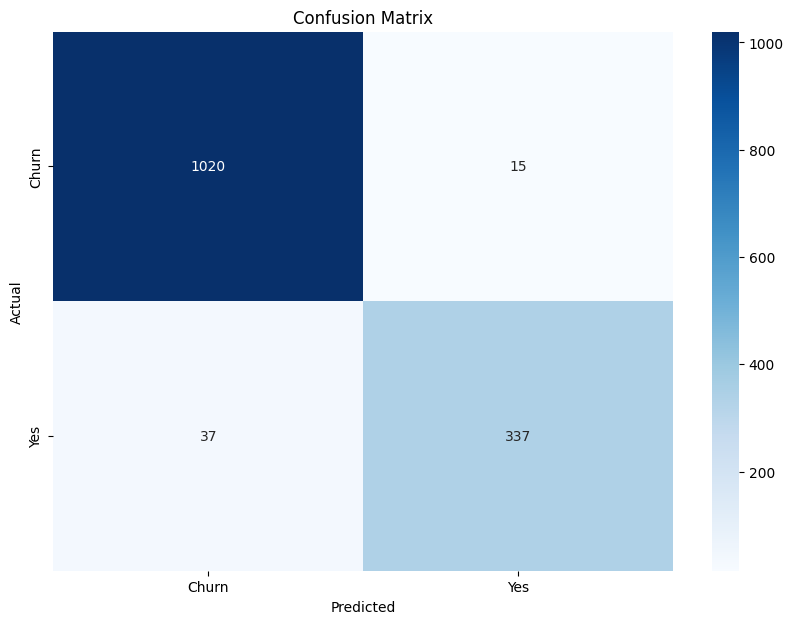

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(Y_test, predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Churn','Yes'], yticklabels=['Churn','Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()